In [4]:
import time

import numpy as np

In [ ]:
H_gate = 1/np.sqrt(2)*np.array([[1,1],
                    [1,-1]])

X_gate = np.array([[0,1],
                   [1,0]])

CNOT_gate = np.array([[1,0,0,0],
                    [0,1,0,0],
                    [0,0,0,1],
                    [0,0,1,0]]).reshape(2,2,2,2)

def apply_single_qubit_gate(state, gate, target_qubit):

    psi_updated = np.tensordot(gate, state, axes=(1,target_qubit))
    psi_updated = np.moveaxis(psi_updated, 0, target_qubit)

    return psi_updated

def apply_cnot_gate(state, target_qubit, control_qubit):

    psi_updated = np.tensordot(CNOT_gate, state, ((2,3), (control_qubit, target_qubit)))
    psi_updated = np.moveaxis(state, (0,1), (control_qubit, target_qubit))

    return psi_updated

def quantum_simulator(N):
    
    start_time = time.time()

    psi = np.zeros((2,)*N)
    psi[(0,)*N] = 1 #initiate example state: |000...001> 
    
    for i in range(N): # apply the gate for each qubit
        psi = apply_single_qubit_gate(psi, X_gate, i)
        psi = apply_single_qubit_gate(psi, H_gate, i)
    
    psi = apply_cnot_gate(psi, N-1, 0)
    
    end_time = time.time()
    runtime = end_time - start_time

    result = psi
    
    return result, runtime


In [9]:
qubits_range = np.arange(2,4,1)
print(qubits_range)

results_range = []
runtime_range = []

for qubit in qubits_range:
    result, runtime = quantum_simulator(qubit)
    results_range.append(result)
    runtime_range.append(runtime)
    print("qubits:", qubit, ", runtime:", runtime)
    print(result.flatten())

[2 3]
qubits: 2 , runtime: 0.0008847713470458984
[ 0.5 -0.5 -0.5  0.5]
qubits: 3 , runtime: 0.0007238388061523438
[ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
  0.35355339 -0.35355339]


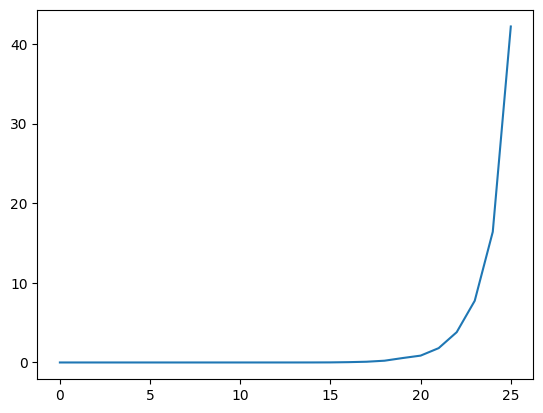

In [2]:
import matplotlib.pyplot as plt

runtime = [0.0005764961242675781,0.0004582405090332031,0.00072479248046875,0.0007426738739013672,0.0010037422180175781,0.0004863739013671875,0.00031447410583496094,0.0003254413604736328,0.00040912628173828125,0.00040078163146972656,0.0005686283111572266,0.0011565685272216797,0.0014486312866210938,0.0023064613342285156,0.004142284393310547,0.011193037033081055,0.04075050354003906,0.09332013130187988,0.2234055995941162,0.5562641620635986,0.8617799282073975,1.800828456878662,3.802558660507202,7.746905565261841,16.40095090866089,42.18431353569031]
plt.plot(runtime)

From the results above, we conclude that the maximum number of qubits that can be simulated with tensor multiplication is higher than the matrix multiplication, which is up to 27 qubits. The runtime charts was shown below: